### Exportar conjunto balanceado para aplicar treinamento 

Script que exporta o conjunto balanceado para posterior análise

In [1]:
import pandas as pd

#from pymongo import MongoClient
import matplotlib.pyplot as plt

# Display plots inline and change default figure size
%matplotlib inline

In [2]:
df_odp_urls = pd.read_csv('./../data-sets/dmoz.csv', header=None, names=['url', 'category'])
df_odp_urls.head()

,url,category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
4,http://www.galeon.com/kmh/,Adult
5,http://www.fanworkrecs.com/,Adult


In [3]:
print(len(df_odp_urls))

df_odp_urls = df_odp_urls.dropna()

print(len(df_odp_urls))

1562978
1562975


In [4]:
df_odp_urls.head()

,url,category
1,http://www.liquidgeneration.com/,Adult
2,http://www.onlineanime.org/,Adult
3,http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...,Adult
4,http://www.galeon.com/kmh/,Adult
5,http://www.fanworkrecs.com/,Adult


In [5]:
n_samples = 35000
categories = df_odp_urls['category'].unique()

df_final = pd.DataFrame(columns=df_odp_urls.columns)
df_final

,url,category


In [6]:
for cat in categories:
    df_aux = df_odp_urls[df_odp_urls['category'] == cat]
    if(len(df_aux) < n_samples):
        df_final = pd.concat([df_final, df_aux])
    else:
        df_final = pd.concat([df_final, df_aux.sample(n=n_samples)])
    print(len(df_final))
    

35000
70000
105000
140000
175000
210000
238269
273269
282258
317258
352258
387258
422258
457258
492258


In [7]:
print(len(df_final))
df_final.head()

492258


,url,category
35144,http://napalona.pl,Adult
3214,http://www.bizarreart.com/,Adult
33241,http://www.beige-club.com/,Adult
2071,http://members.tripod.com/~lywendre/roadsless....,Adult
8267,http://www.free-porn-pussy-sex-pics.com/free-e...,Adult


In [8]:
pd.set_option('display.max_rows', None)
print(df_final['category'].nunique())
print(len(df_final))
df_final.groupby('category').count()

15
492258


,url
category,
Adult,35000
Arts,35000
Business,35000
Computers,35000
Games,35000
Health,35000
Home,28269
Kids,35000
News,8989


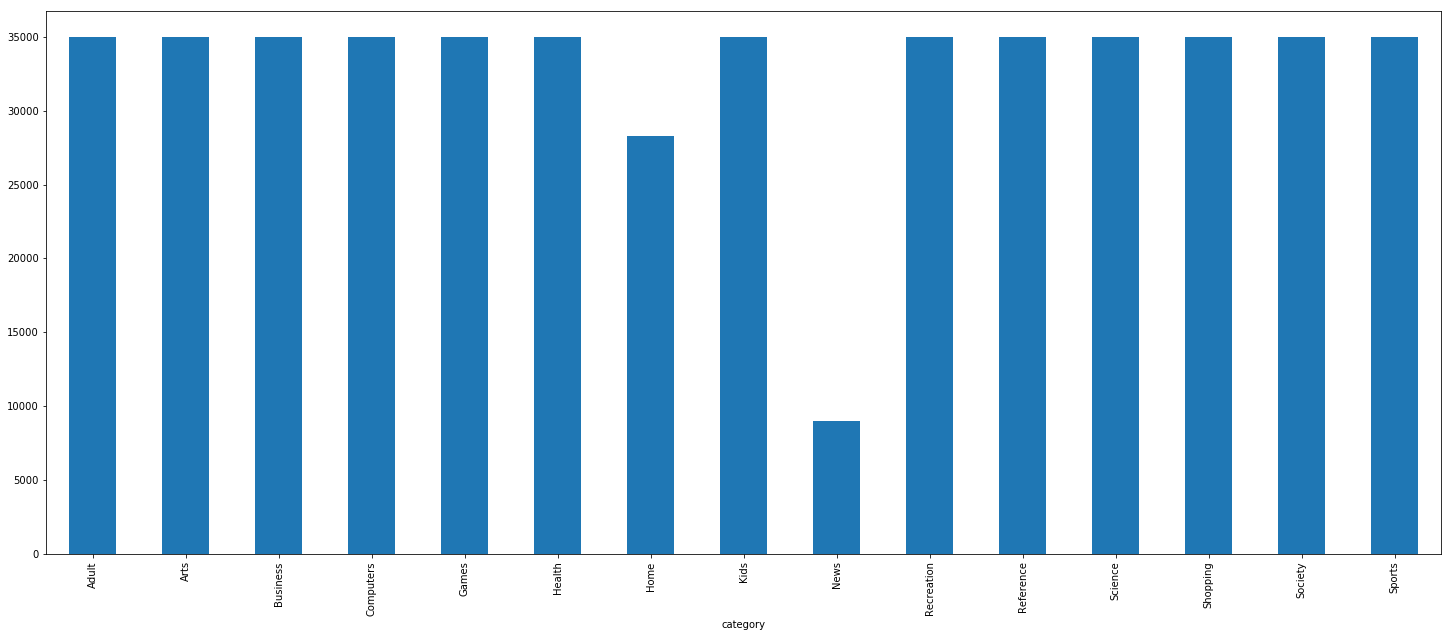

In [9]:
plt.figure(1,figsize=(25,10))
df_final.groupby('category')['url'].count().plot.bar()

In [10]:
df_final = df_final[df_final['category'] != 'News']

In [11]:
pd.set_option('display.max_rows', None)
print(df_final['category'].nunique())
print(len(df_final))
df_final.groupby('category').count()

14
483269


,url
category,
Adult,35000
Arts,35000
Business,35000
Computers,35000
Games,35000
Health,35000
Home,28269
Kids,35000
Recreation,35000


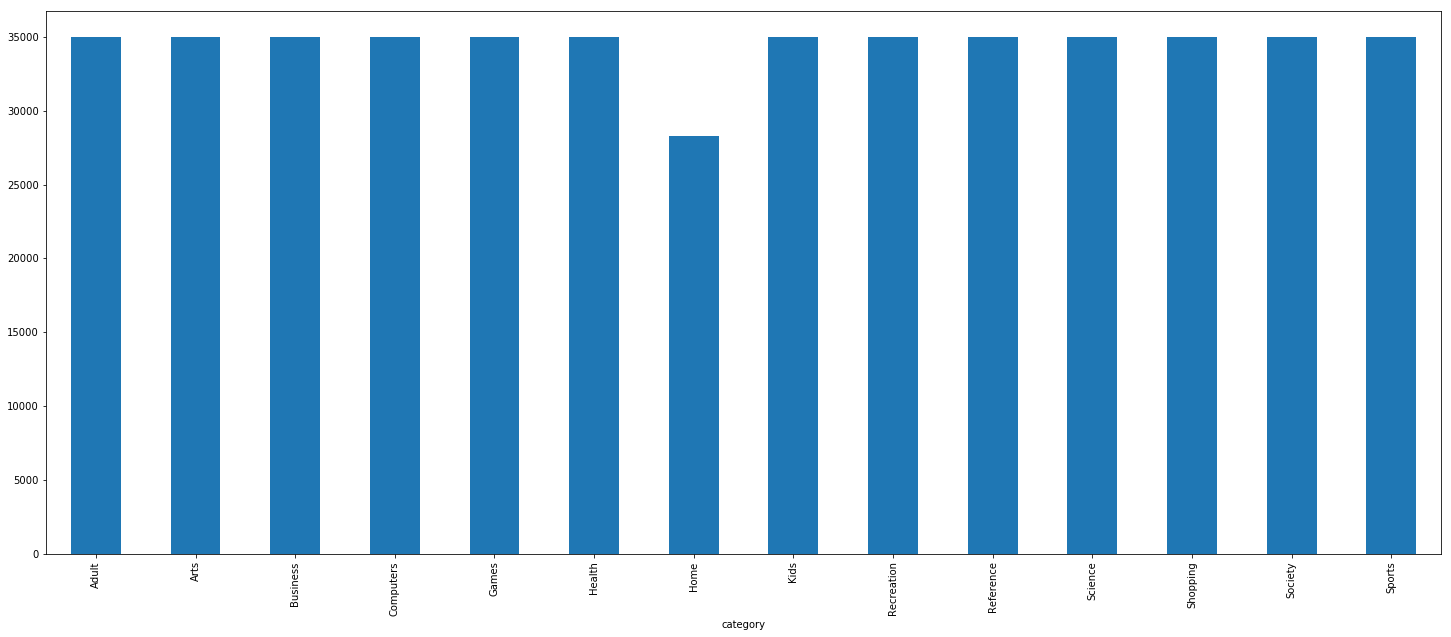

In [12]:
plt.figure(1,figsize=(25,10))
df_final.groupby('category')['url'].count().plot.bar()

In [13]:
df_final.to_csv('./../data-sets/odp_35_amostras.csv', index=False)